## 3-D Triangle Geometry: Isosceles Detection for Structural Symmetry
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What does the program do?
Keeping the scanner at the origin, we want to form a narrow, isosceles triangle, such that the field of view spans a total of 45 degrees. This ensures that we get a symmetric triangle, with each side spanning 22.5 degrees from the vertical.

#### i. Importing the required libraries:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


#### ii. Loading and cleaning the dataset:

In [2]:
# Load the 'reduced' sheet from Google Sheets and extract x, y
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'
df = pd.read_csv(url)
df = df[['x', 'y']].copy()
df.columns = ['X', 'Y']
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df = df.dropna(subset=['X', 'Y']).reset_index(drop=True)


#### iii. Sorting the dataset by their X and Y coordinates:

In [3]:
# Sort the data for consistent processing
df_sorted = df.sort_values(by=['X', 'Y']).reset_index(drop=True)


#### iv. Computing the X boundaries for 45° FOV (±22.5° from vertical):

In [4]:
# Define half-angle in radians (22.5°)
theta_half_deg = 22.5
theta_half_rad = math.radians(theta_half_deg)
slope = math.tan(theta_half_rad)


#### v. Identifying the points inside the 45° triangle:

In [5]:
# Points inside triangle if: -slope*Y <= X <= slope*Y and Y >= 0
inside_mask = (df_sorted['Y'] >= 0) & \
              (df_sorted['X'] >= -slope * df_sorted['Y']) & \
              (df_sorted['X'] <=  slope * df_sorted['Y'])
inside_points = df_sorted[inside_mask]
outside_points = df_sorted[~inside_mask]


#### vi. Plotting the points (both inside and outside the triangle):

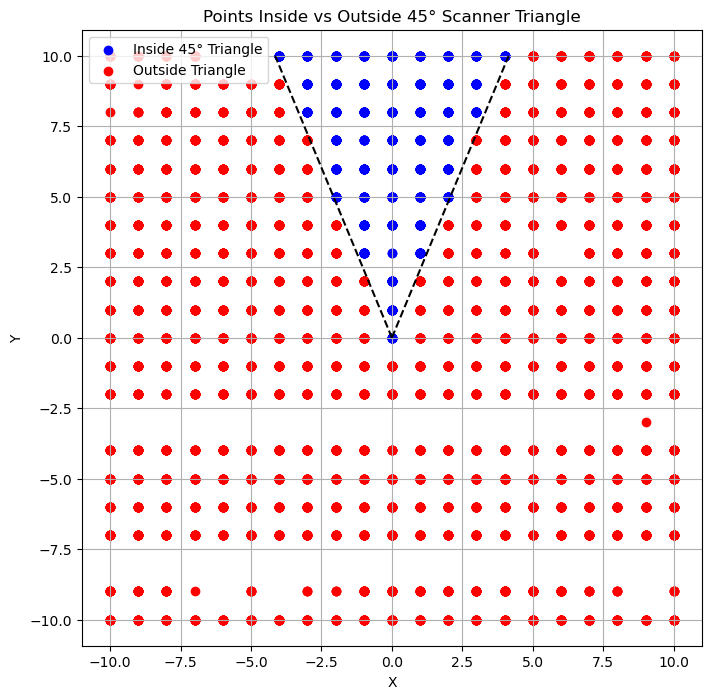

In [6]:
# Plot the triangle and points inside/outside
plt.figure(figsize=(8, 8))
plt.scatter(inside_points['X'], inside_points['Y'], color='blue', label='Inside 45° Triangle')
plt.scatter(outside_points['X'], outside_points['Y'], color='red', label='Outside Triangle')

# Draw triangle edges for reference
ymax = df_sorted['Y'].max()
x_bound = ymax * slope
plt.plot([0, -x_bound], [0, ymax], 'k--')  # Left edge
plt.plot([0,  x_bound], [0, ymax], 'k--')  # Right edge

plt.title("Points Inside vs Outside 45° Scanner Triangle")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
